<h1>Linear Regression 1D: Training One Parameter</h1>


In [35]:
import numpy as np
import matplotlib.pyplot as plt
import torch

In [36]:
class plot_diagram():
  def __init__(self, X, Y, w, stop, go = False):
    start = w.data
    self.error = []
    self.parameter = []
    print(type(X.numpy()))
    self.X = X.numpy()

    self.Y = Y.numpy()
    self.parameter_values = torch.arange(start, stop)
    self.Loss_function = [criterion(forward(X),Y) for w.data in self.parameter_values]
    w.data = start


  def __call__(self, Yhat, w, error, n):
        self.error.append(error)
        self.parameter.append(w.data)
        plt.subplot(212)
        plt.plot(self.X, Yhat.detach().numpy())
        plt.plot(self.X, self.Y,'ro')
        plt.xlabel("A")
        plt.ylim(-20, 20)
        plt.subplot(211)
        plt.title("Data Space (top) Estimated Line (bottom) Iteration " + str(n))
        # Convert lists to PyTorch tensors
        parameter_values_tensor = torch.tensor(self.parameter_values)
        loss_function_tensor = torch.tensor(self.Loss_function)

        # Plot using the tensors
        plt.plot(parameter_values_tensor.numpy(), loss_function_tensor.numpy())

        plt.plot(self.parameter, self.error, 'ro')
        plt.xlabel("B")
        plt.figure()


  def __del__(self):
      plt.close("all")

In [37]:
X = torch.arange(-3, 3, 0.1).view(-1, 1)
f = -3 * X


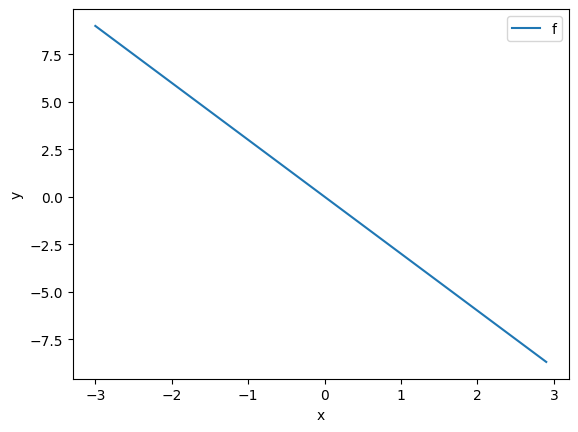

In [38]:
plt.plot(X.numpy(),f.numpy(),label='f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show();

In [74]:
Y = f + 0.1 * torch.randn(X.size())


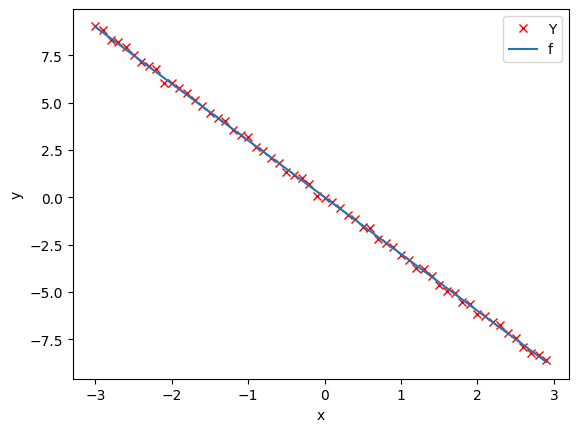

In [75]:
plt.plot(X.numpy(), Y.numpy(), 'rx', label= 'Y')

plt.plot(X.numpy(), f.numpy(), label='f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show();

In [76]:
def forward(x):
  return w * x

In [77]:
def criterion(yhat, y):
  return torch.mean((yhat - y) ** 2)

In [78]:
lr = 0.1
LOSS = []

In [79]:
w = torch.tensor(-10.0, requires_grad=True)

In [80]:
gradient_plot = plot_diagram(X, Y, w, stop=5)

<class 'numpy.ndarray'>


In [81]:
def train_model(iter):
  for epoch in range(iter):

    #Make prediction
    Yhat = forward(X)

    #calculate the iteration
    loss = criterion(Yhat,Y)

    #Plot the diagram
    gradient_plot(Yhat, w, loss.item(), epoch)

    #Store the lost into list
    LOSS.append(loss.item())

    #calculate the gradients
    loss.backward()

    #update the parameters
    w.data = w.data - lr * w.grad.data

    #zero the gradients before running the backward pass
    w.grad.data.zero_()

/tmp/ipython-input-1945045040.py:26: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  parameter_values_tensor = torch.tensor(self.parameter_values)


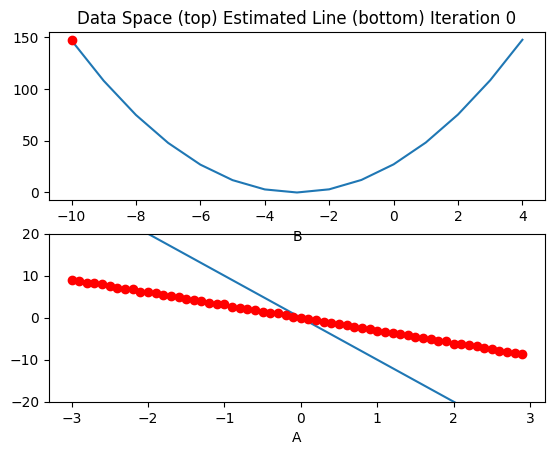

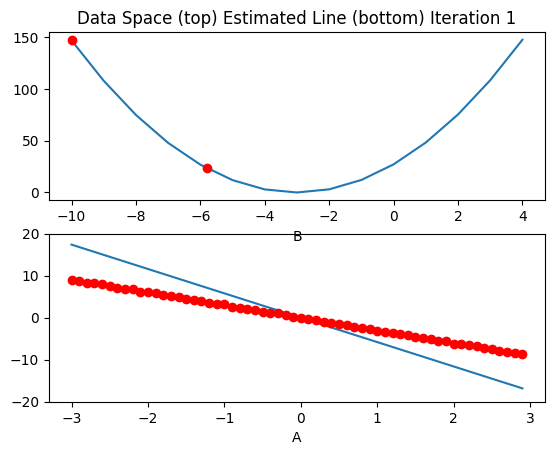

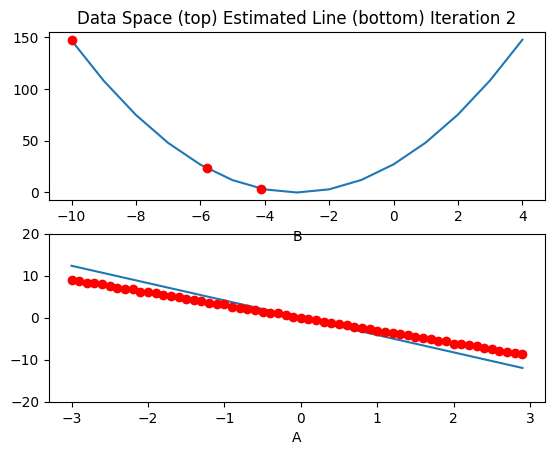

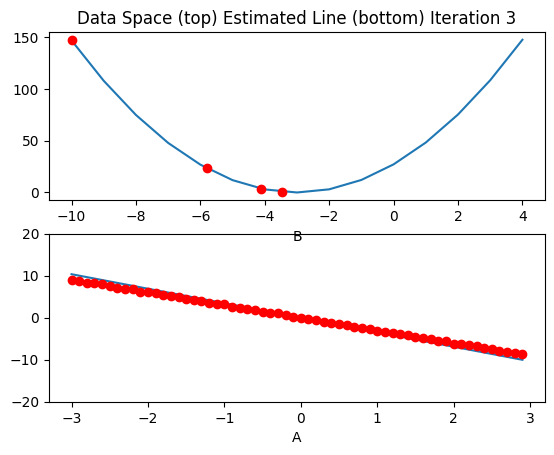

<Figure size 640x480 with 0 Axes>

In [82]:
train_model(4)

Text(38.347222222222214, 0.5, 'Cost')

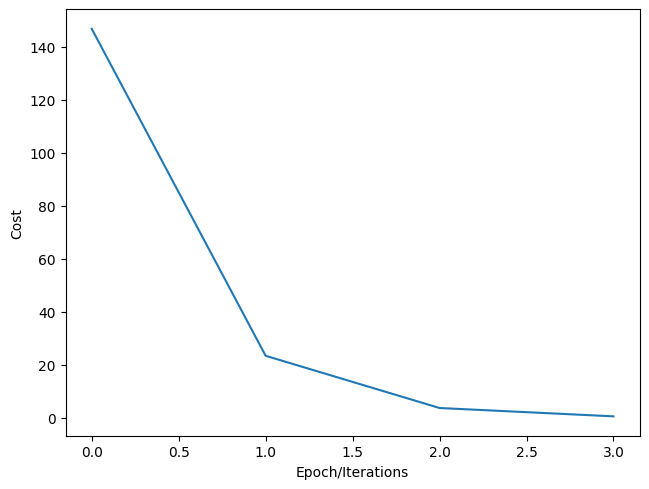

In [83]:
# Plot the loss for each iteration

plt.plot(LOSS)
plt.tight_layout()
plt.xlabel("Epoch/Iterations")
plt.ylabel("Cost")

In [92]:
w_2 = torch.tensor(-15.0, requires_grad=True)

In [93]:
LOSS2 = []

In [94]:
gradient_plot1 = plot_diagram(X, Y, w_2, stop=15)

<class 'numpy.ndarray'>


/tmp/ipython-input-1945045040.py:26: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  parameter_values_tensor = torch.tensor(self.parameter_values)


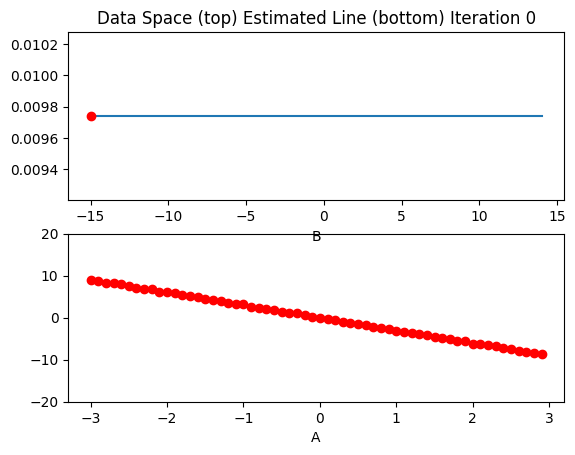

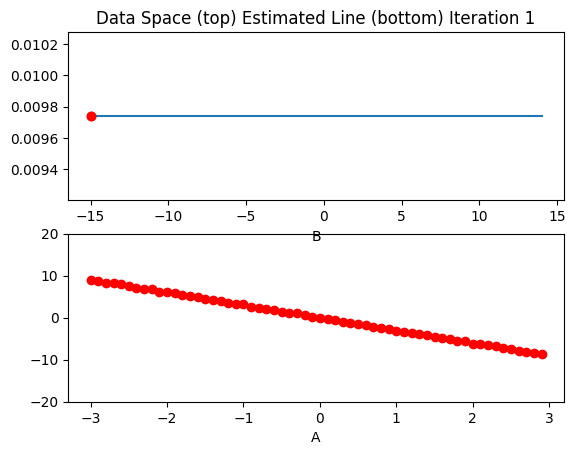

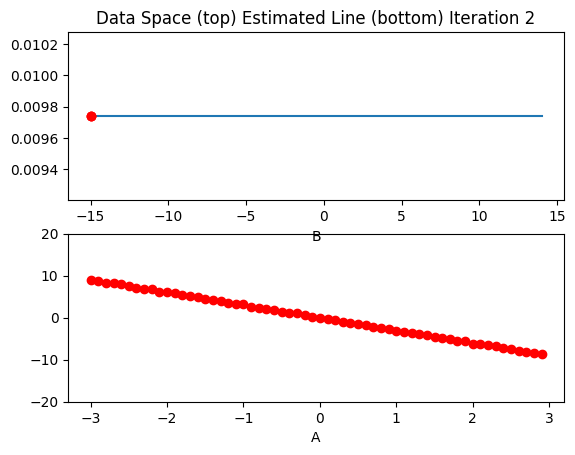

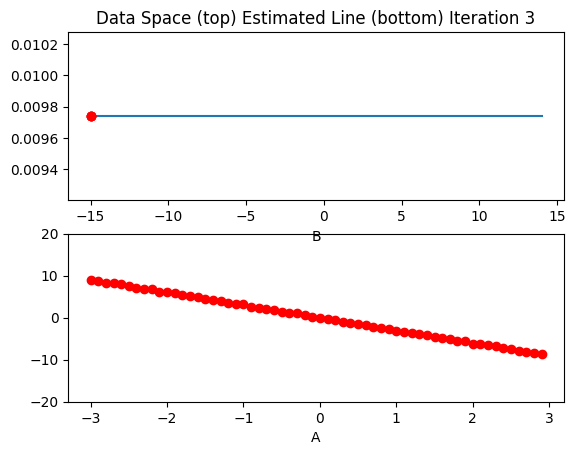

<Figure size 640x480 with 0 Axes>

In [95]:
def my_train_model(iter):
    for epoch in range (iter):
        Yhat = forward(X)
        loss = criterion(Yhat,Y)
        gradient_plot1(Yhat, w_2, loss.item(), epoch)
        LOSS2.append(loss.item())
        loss.backward()
        w.data = w.data - lr * w.grad.data
        w.grad.data.zero_()
my_train_model(4)

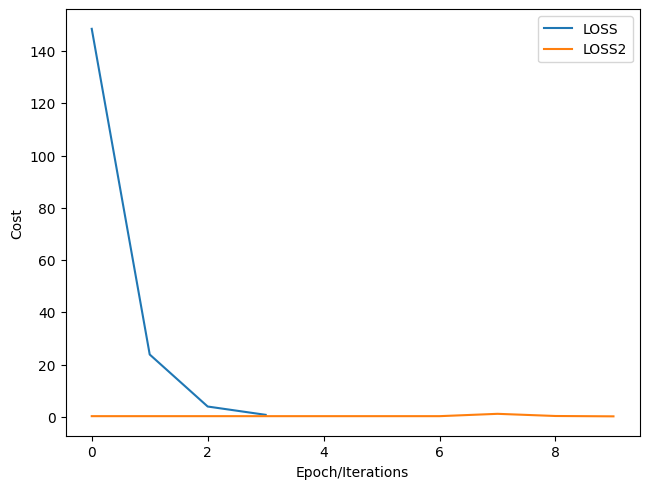

In [73]:
plt.plot(LOSS, label = "LOSS")
plt.plot(LOSS2, label = "LOSS2")
plt.tight_layout()
plt.xlabel("Epoch/Iterations")
plt.ylabel("Cost")
plt.legend()